# Building a Single Layer Neural Network in PyTorch

Link to the [tutorial](https://machinelearningmastery.com/building-a-single-layer-neural-network-in-pytorch/).

In [1]:
import torch
import matplotlib.pyplot as plt

from tqdm import tqdm

## Preparing the data

**A neural network simply a function that approximates other functions with some parameters.**

Let’s build some data and see how our single layer neural network
approximates the function to make the data linearly separable.

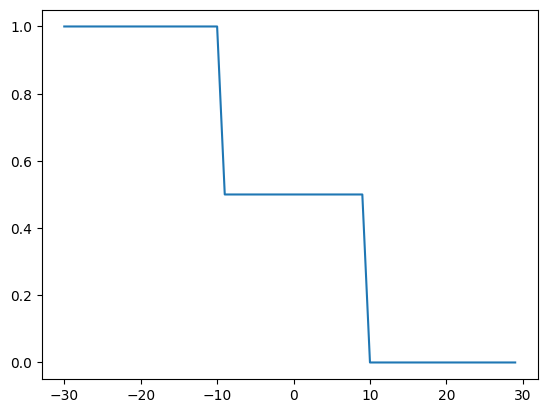

In [2]:
# generate synthetic the data
X = torch.arange(-30, 30, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] <= -10)] = 1.0
Y[(X[:, 0] > -10) & (X[:, 0] < 10)] = 0.5
Y[(X[:, 0] > 10)] = 0

plt.plot(X, Y)
plt.show()


## Building the model

Next, let’s build our custom module for single layer neural network with nn.Module.

This neural network features an input layer, a hidden layer with two neurons,
and an output layer.

After each layer, a sigmoid activation function is applied. Other kind of
activation functions are available in PyTorch but the classic design for this
network is to use sigmoid function.

In [3]:
# Define the class for single layer NN
class one_layer_net(torch.nn.Module):
    # Constructor
    def __init__(self, input_size, hidden_neurons, output_size):
        super(one_layer_net, self).__init__()

        # Inside the constructor, two linear layers are defined. The first one
        # (self.linear_one) connects the input to the hidden layer with
        # input_size input features and hidden_neurons neurons. The second one
        # (self.linear_two) connects the hidden layer to the output layer with
        # hidden_neurons input features and output_size output features.
        self.linear_one = torch.nn.Linear(input_size, hidden_neurons)
        self.linear_two = torch.nn.Linear(hidden_neurons, output_size)

        # Here, three attributes (self.layer_in, self.act, and self.layer_out)
        # are initialized as None. These attributes will be used to store the
        # input, activation, and output of the neural network during its forward
        # pass.
        self.layer_in = None
        self.act = None
        self.layer_out = None

    # prediction function
    # The forward method defines the forward pass of the
    # neural network. Given an input x, it calculates the input to the hidden
    # layer (layer_in), applies the sigmoid activation function (act),
    # calculates the output of the neural network (layer_out), and returns the
    # final prediction (y_pred).
    def forward(self, x):
        self.layer_in = self.linear_one(x)
        self.act = torch.sigmoid(self.layer_in)
        self.layer_out = self.linear_two(self.act)
        y_pred = torch.sigmoid(self.linear_two(self.act))
        return y_pred


# create the model
model = one_layer_net(1, 2, 1)  # 2 represents two neurons in one hidden layer


In [4]:
model

one_layer_net(
  (linear_one): Linear(in_features=1, out_features=2, bias=True)
  (linear_two): Linear(in_features=2, out_features=1, bias=True)
)

## Train the model

Before starting the training loop, let’s define loss function and optimizer for the model.


In [5]:
# This code defines a custom loss function named criterion. The loss function
# computes the binary cross-entropy loss between the predicted values (y_pred)
# and the actual target values (y). Binary cross-entropy loss is commonly used
# for binary classification problems. The formula for binary cross-entropy loss
# is as follows:
#     L = −1/n ∑(y log(y_pred) + (1 − y) log(1 − y_pred))
# where n is the number of samples in the dataset, y is the target value, and
# y_pred is the predicted value.
def criterion(y_pred, y):
    out = -1 * torch.mean(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))
    return out

# This code defines an optimizer using stochastic gradient descent (SGD) as the
# optimization algorithm. The optimizer is set to update the parameters of the
# neural network model (model.parameters()) with a learning rate of 0.01. The
# purpose of an optimizer is to adjust the model's parameters during training in
# order to minimize the defined loss function (criterion in this case).
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [6]:
# if torch.cuda.is_available():
#     device = torch.device("cuda")  # Use the GPU
#     model.to(device)  # Move the network to the GPU
# else:
#     device = torch.device("cpu")  # Use the CPU

# device=torch.device("cpu")

# print(device)


Let’s train the model for 4000 epochs. You will see a plot of how the neural network approximates the function after every 4000 epochs.

 25%|██▍       | 999/4000 [01:19<04:05, 12.21it/s]

1000 epochs done!


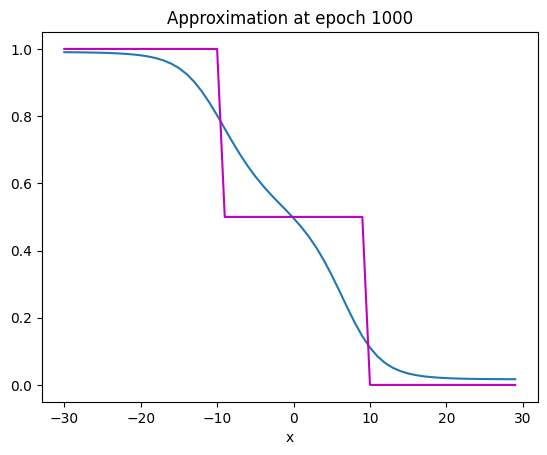

 50%|████▉     | 1999/4000 [02:32<02:17, 14.58it/s]

2000 epochs done!


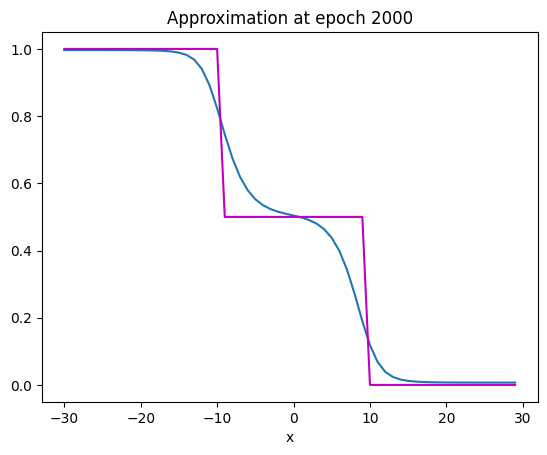

 75%|███████▍  | 2999/4000 [03:44<01:07, 14.90it/s]

3000 epochs done!


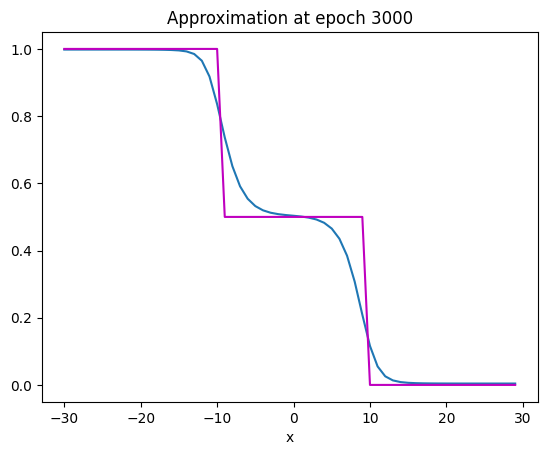

100%|█████████▉| 3999/4000 [05:01<00:00, 12.23it/s]

4000 epochs done!


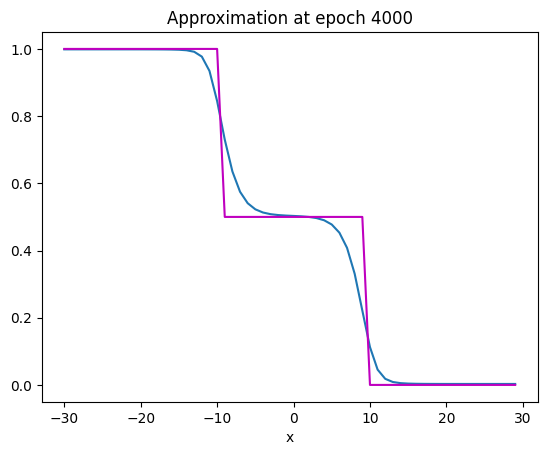

In [7]:
# Define the training loop

# X = X.to(device)
# Y = Y.to(device)

epochs = 4000
cost = []
total = 0

progress_bar = tqdm(range(epochs))

for epoch in range(epochs):
    total = 0
    epoch = epoch + 1
    progress_bar.update(1)
    for x, y in zip(X, Y):
        # x, y = x.to(device), y.to(device)
        # prediction
        yhat = model(x)
        # loss calculation by comparing prediction with actual
        loss = criterion(yhat, y)
        # Backpropagation is performed by calling the backward method on the
        # loss. This step computes gradients with respect to the model's
        # parameters, which will be used to update the model during
        # optimization.
        loss.backward()
        # The optimizer (optimizer) updates the model's parameters based on the
        # computed gradients. This is the step where the model parameters are
        # adjusted to minimize the loss.
        optimizer.step()
        # The gradients are cleared to prepare for the next iteration. This is
        # necessary because PyTorch accumulates gradients by default.
        optimizer.zero_grad()
        # get total loss
        total += loss.item()
    cost.append(total)

    # visualze results after every 1000 epochs
    if epoch % 1000 == 0:
        print(str(epoch) + " " + "epochs done!")
        # plot the result of function approximator
        plt.plot(X.numpy(), model(X).detach().numpy())
        plt.plot(X.numpy(), Y.numpy(), "m")
        plt.xlabel("x")
        plt.title(f"Approximation at epoch {epoch}")
        plt.show()

# around 3000 epochs, the model converges ; circa 4 mins on CPU


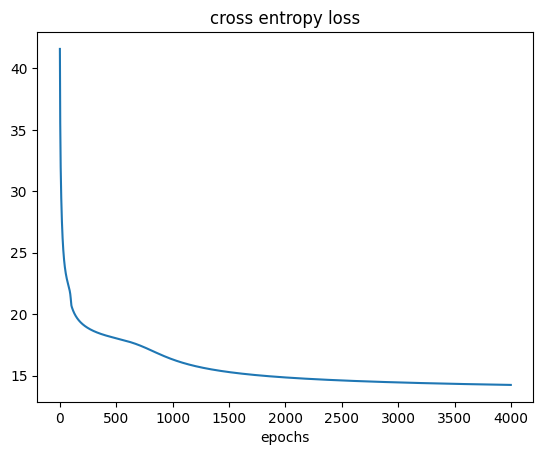

In [8]:
# plot the cost
plt.plot(cost)
plt.xlabel('epochs')
plt.title('cross entropy loss')
plt.show()

## Model visualization with torchviz

In `torchviz` graphs, nodes are color-coded to provide information about their type. Here's a general overview of the color coding used in `torchviz` graphs:

1. **Blue Nodes**: Typically, blue nodes represent input nodes, which correspond to the input data or tensors provided to the model. These nodes represent the initial data that flows into the network.

2. **Green Nodes**: Green nodes are used for operation nodes that represent the computational operations performed on the input data. These can include linear transformations (e.g., linear layers), activation functions (e.g., ReLU), and other mathematical operations.

3. **Orange Nodes**: Orange nodes are often used to indicate output nodes. They represent the final outputs of the model or specific tensors that you choose to visualize.

4. **Purple Nodes**: In some cases, purple nodes may be used to represent special operations or control flow within the model.

5. **Grey Nodes**: Grey nodes are used to represent the parameters of the model.

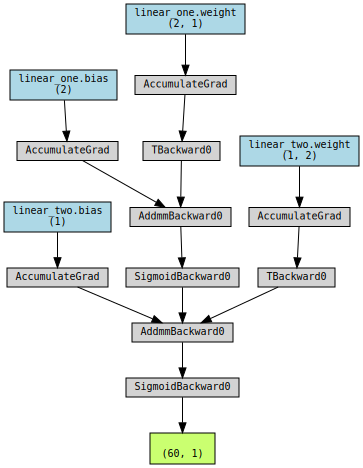

100%|██████████| 4000/4000 [05:20<00:00, 12.23it/s]

In [9]:
from torchviz import make_dot


# Visualize the graph
dot = make_dot(model(X), params=dict(model.named_parameters()))
dot.format = 'png'  # You can choose other formats like 'pdf', 'svg', etc.
dot.render("computation_graph")  # This saves the graph to a file
dot  # This renders the graph in the Jupyter Notebook
